# Beauty plot for 2000-2020 fig

In [3]:
import matplotlib.pyplot as plt
import datetime
import numpy as np

from src.utils import modif_plot
from src.utils import save_name
from src.modelling import sit_corrected
from src.visualization import intercomp_sit

import src.utils.tardisml_utils as tardisml_utils
rootdir = tardisml_utils.get_rootdir()

In [62]:
from src.data_preparation import merge_TOPAZ

In [63]:
from importlib import reload
reload(merge_TOPAZ)

<module 'src.data_preparation.merge_TOPAZ' from '/users/edelleo1/tardis/tardis-ml/src/data_preparation/merge_TOPAZ.py'>

---------

### Load freerun

In [64]:
sit_fr = merge_TOPAZ.load_freerun()

Loading...
Merging...


In [68]:
sfr = sit_fr.mean(dim=('x','y'))

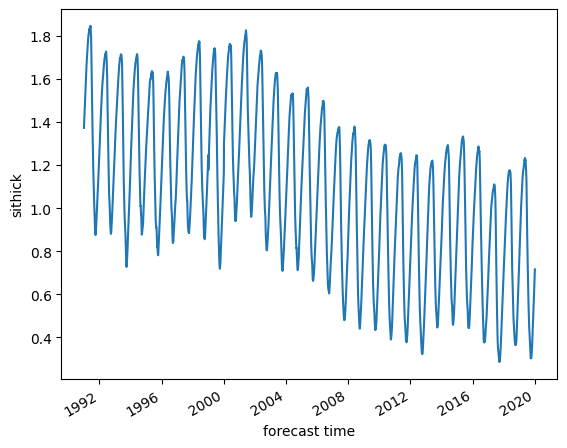

In [72]:
sfr.plot()
# plt.xlim([np.datetime64('1998-06-22T00:00:00.000000000'),
#          np.datetime64('1999-06-22T00:00:00.000000000')])

---------

In [73]:
models = {}

In [74]:
# ---------------------------------
#       Import all predictions
# ---------------------------------

### LSTM model
irootdir= f'{rootdir}'
ipath = 'Leo/results/lstm_230201-112355/'
ml_name ='LSTM'

ifile = f'{irootdir}{ipath}'
models[f'{ml_name}'] = sit_corrected.SITCorrected(ifile, name=ml_name, verbose=1, objective='apply')



# ------------------------------------------------
##            Reconstruct SIT values 
# ------------------------------------------------

print('\nReconstructing SIT...')

for mdl in models:
    models[mdl].reconstruct_sit()
    # models[mdl].save_sit()
    models[mdl].compute_mean(sit_min=None)    
    

Config file found: /scratch/project_465000269/edelleo1/Leo/results/lstm_230201-112355/config_LSTM_no_bias_0wk.yaml
Folder: Leo/results/lstm_230201-112355/figures/sit_reconstruct/

Initialisation SIT from LSTM


/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.1.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


ML prediction .nc file found: /scratch/project_465000269/edelleo1/Leo/results/lstm_230201-112355/ml/ypred_LSTM3_bk_2000_2011.nc

Reconstructing SIT...


In [75]:
# ---------------------------------
#       Import 2011-2020
# ---------------------------------


### LSTM model
irootdir= f'{rootdir}'
ipath = 'Leo/results/lstm_230201-112355/'
ml_name ='LSTM3_bk'

ifile = f'{irootdir}{ipath}'
models[f'{ml_name}'] = sit_corrected.SITCorrected(ifile, name=ml_name, verbose=1)



# ------------------------------------------------
##            Reconstruct SIT values 
# ------------------------------------------------

print('\nReconstructing SIT...')

for mdl in models:
    models[mdl].reconstruct_sit()
    models[mdl].compute_mean(sit_min=None)    
    

Config file found: /scratch/project_465000269/edelleo1/Leo/results/lstm_230201-112355/config_LSTM_no_bias_0wk.yaml
Folder: Leo/results/lstm_230201-112355/figures/sit_reconstruct/

Initialisation SIT from LSTM3_bk


/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.1.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


ML prediction .nc file found: /scratch/project_465000269/edelleo1/Leo/results/lstm_230201-112355/ml/ypred_LSTM3_bk.nc

Reconstructing SIT...


In [ ]:
# colors from plasma or inferno for all ML algo
# cmap = plt.cm.get_cmap('plasma')
# cmap = plt.cm.get_cmap('rainbow')
# color_arr = np.linspace(0, 1, len(models.keys()))
# list_colors = [cmap(fl) for fl in color_arr]

# NEW default colors  (for presentation SIAM - 20230619)
# TOPAZ (no assimilation):   orange   = #ff7f0e
# TOPAZ (assimilation)   :   blue     = #1f77b4
# baseline               :   green    = #2ca02c
# LSTM                   :   red      = #d62728

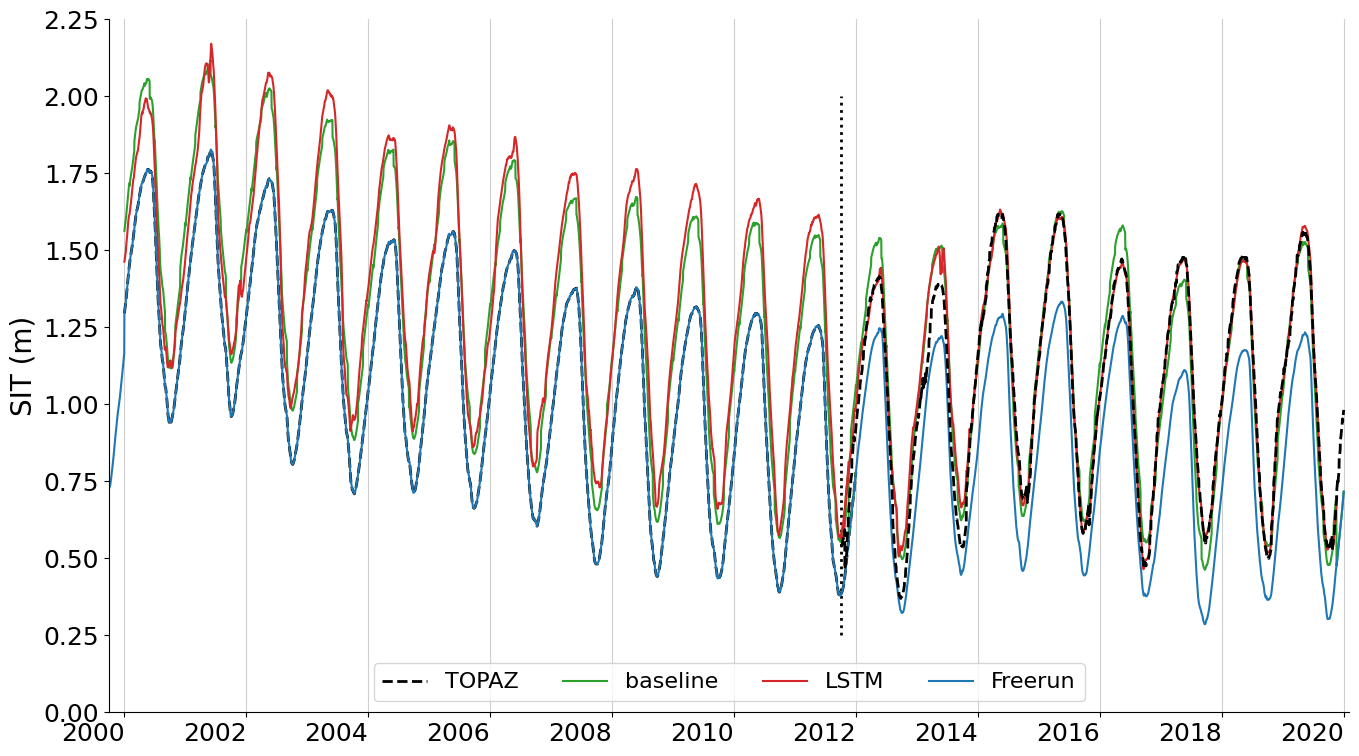

In [78]:
# ------------------------------------------------
##       Plot  line average
# ------------------------------------------------
fig, ax = plt.subplots(figsize=(16,9))

# first model loaded is the default one
model_default = models[list(models.keys())[0]] 

# plot 2000 - 2011
# model_default.sit_nam.plot(label='TOPAZ', c='#1f77b4')
model_default.sit_nam.plot(label='TOPAZ', c='k', lw=2, ls='--')

model_default.sit_blm.plot(label='baseline', c='#2ca02c')


# plot 2012- 2020
model_default.sit_am.plot(c='k', lw=2, ls='--', zorder=10)  # label='TOPAZ4b'

model_2012 = models[list(models.keys())[1]] 
model_2012.sit_blm.plot(c='#2ca02c')
model_2012.sit_m.plot(c='#d62728')


# for LSTM only
model_default.sit_m.plot(label='LSTM', c='#d62728')

# for tick in ax.xaxis.get_major_ticks():
#     tick.set_pad(15)

# plot freerun
sfr.plot(label='Freerun')


ax.plot([datetime.datetime(2011,10,1)]*2, 
        [0.25,2.0], lw=2, ls=':', c='k', zorder=-10)


    
ax.set_ylabel('SIT (m)')
ax.set_xlabel('')
ax.spines[['right', 'top']].set_visible(False)

ax.set_xlim([datetime.datetime(1999,10,1), datetime.datetime(2020,2,1)])
ax.set_ylim([0.0, 2.25])

ax.xaxis.grid(alpha=0.6)

plt.legend(ncol=4, loc='lower center', fontsize=16)


modif_plot.resize(fig, s=18)

savefig = False 
if savefig:
    odir = f'{rootdir}Leo/results/application/'
    ofile = f'SIT_2000_2020_01.png'
    ofile = save_name.check(odir, ofile)
    plt.savefig(f"{odir}{ofile}", dpi=124)
    print(f'Saved as: {odir}{ofile}')